In [1]:
import tensorflow as tf
import numpy as np

## Tensor

In [2]:
tf.constant([1,2,3])

<tf.Tensor: id=0, shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [3]:
tf.constant([[1,2],[1,2]])

<tf.Tensor: id=1, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2]])>

In [4]:
arr = np.array([1,2,3])
arr

array([1, 2, 3])

In [5]:
tensor = tf.constant(arr)
tensor

<tf.Tensor: id=2, shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [6]:
tensor.dtype

tf.int32

In [7]:
tensor = tf.constant([1,2], dtype = tf.float32)
tensor

<tf.Tensor: id=3, shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [8]:
tf.cast(tensor, dtype=tf.uint8)

<tf.Tensor: id=4, shape=(2,), dtype=uint8, numpy=array([1, 2], dtype=uint8)>

In [9]:
tensor.numpy()

array([1., 2.], dtype=float32)

In [10]:
np.array(tensor)

array([1., 2.], dtype=float32)

In [11]:
type(tensor)

tensorflow.python.framework.ops.EagerTensor

In [12]:
type(tensor.numpy())

numpy.ndarray

In [13]:
tf.random.normal([3,3])

<tf.Tensor: id=10, shape=(3, 3), dtype=float32, numpy=
array([[ 0.4319078, -0.463746 ,  1.6081342],
       [ 0.0609693, -0.5448273,  0.8509661],
       [ 1.4441159,  1.5564612, -1.7661268]], dtype=float32)>

In [14]:
tf.random.uniform([4,4])

<tf.Tensor: id=17, shape=(4, 4), dtype=float32, numpy=
array([[0.9338132 , 0.8706186 , 0.6681688 , 0.2676258 ],
       [0.67767966, 0.00970602, 0.69014835, 0.557711  ],
       [0.11388242, 0.5314983 , 0.69867325, 0.48679483],
       [0.2568339 , 0.3909787 , 0.9564259 , 0.8512157 ]], dtype=float32)>

## 그래프와 이미지 합성

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [16]:
data = np.random.randn(30).cumsum()
data

array([ -2.50067593,  -2.54062309,  -5.11021644,  -3.2339623 ,
        -3.44231545,  -3.69319224,  -4.01869587,  -5.63341116,
        -6.04240915,  -7.21806524,  -7.61910318,  -8.29688702,
        -9.30920705,  -9.48284096, -10.74274491, -11.32371562,
       -11.57780027, -12.19339097, -11.58215299, -12.47034602,
       -11.963801  , -10.21853281,  -7.13192652,  -7.42146416,
        -7.4208667 ,  -8.46940422,  -8.56485495,  -7.99972519,
        -6.84113516,  -6.28570538])

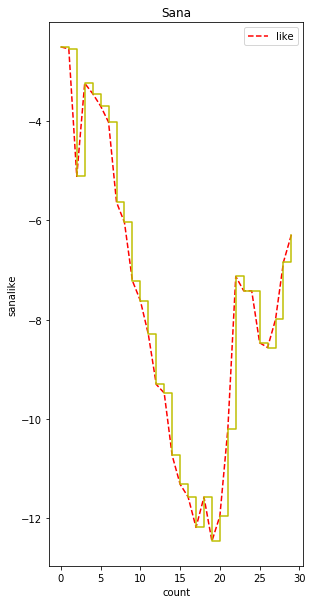

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(data,'r--',label = "like")
plt.plot(data,'y-',drawstyle= "steps-post")
plt.ylabel("sanalike")
plt.xlabel("count")
plt.title("Sana")
plt.legend()
plt.show()

In [18]:
path = 'source/sana3.jpg'
sana3 = Image.open(path)
sana3_np = np.array(sana3)

sana3_b = Image.open(path).convert("L")
sana3_b_np = np.array(sana3_b)

path1 = 'source/sana4.jpg'
sana4 = Image.open(path1)
sana4_np = np.array(sana4)

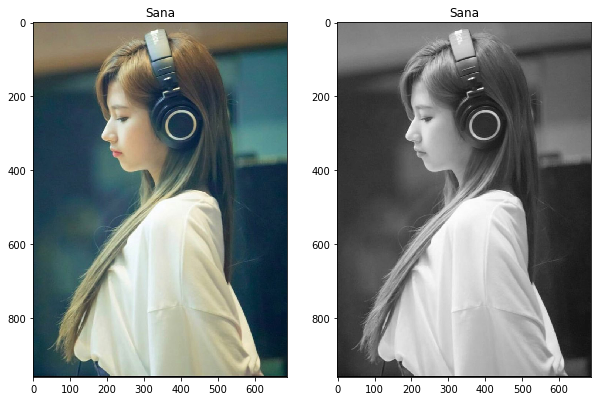

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(sana3_np)
plt.title("Sana")

plt.subplot(1,2,2)
plt.imshow(sana3_b_np,'gray')
plt.title("Sana")
plt.show()

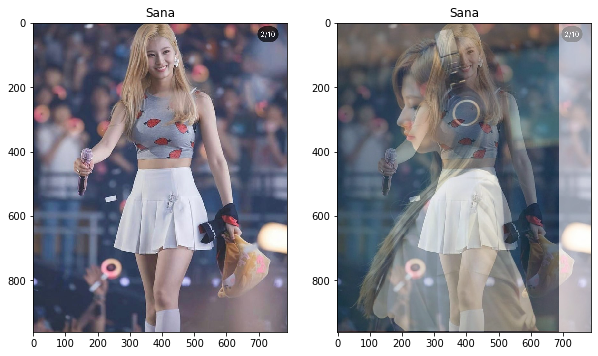

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(sana4_np)
plt.title("Sana")

plt.subplot(1,2,2)
plt.imshow(sana3_np)
plt.imshow(sana4_np, alpha = 0.5)
plt.title("Sana")
plt.show()

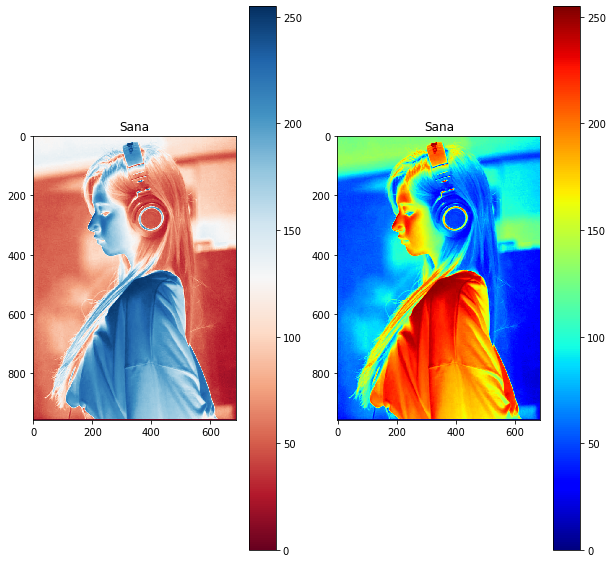

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(sana3_b_np,'RdBu')
plt.title("Sana")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(sana3_b_np,'jet')
plt.title("Sana")
plt.colorbar()
plt.show()

## Feature Extraction

- Convolution : 특징을 추출하는 작업
- ReLU or Activation : 음수값 제거 작업
- Pooling : 그룹별로 큰수만 뽑아서 다시 만드는 압축작업
- Dropout : 학습할 정도의 %

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from PIL import Image
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [23]:
mnist = datasets.mnist

In [24]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()

In [25]:
train_x.shape, train_x[0].shape

((60000, 28, 28), (28, 28))

In [26]:
five = train_x[0]
five_answer = train_y[0]
five_label = to_categorical(five_answer,10)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


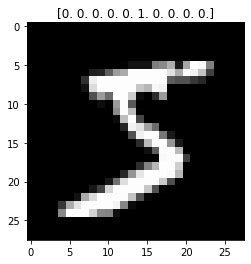

In [27]:
plt.imshow(five, 'gray')
plt.title(five_label)
plt.show()

In [28]:
five.shape

(28, 28)

In [29]:
five.dtype

dtype('uint8')

In [30]:
five = tf.cast(five, dtype = tf.float32)
five.dtype

tf.float32

In [31]:
five = five[tf.newaxis,...,tf.newaxis]
five.shape

TensorShape([1, 28, 28, 1])

In [32]:
layer = tf.keras.layers.Conv2D(3,3,1,padding = "SAME")
five = layer(five)

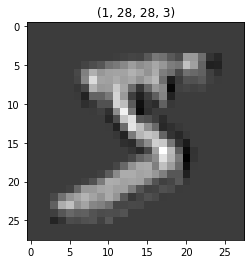

In [33]:
plt.imshow(five[0,:,:,0],'gray')
plt.title(five.shape)
plt.show()

In [34]:
layer1 = tf.keras.layers.ReLU()
five = layer1(five)

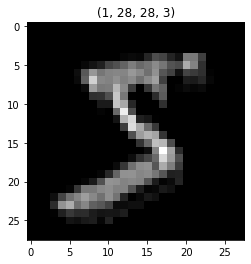

In [35]:
plt.imshow(five[0,:,:,0],'gray')
plt.title(five.shape)
plt.show()

In [36]:
layer2 = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding="SAME")
five = layer2(five)

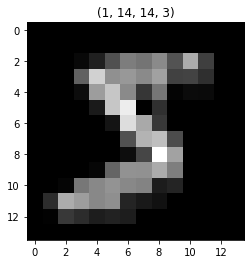

In [37]:
plt.imshow(five[0,:,:,0],'gray')
plt.title(five.shape)
plt.show()

## Fully Connected

- Flatten : 일렬로 붙인다
- Dense : 쪼개는 것
- Dropout : 학습할 정도의 %

In [38]:
layer3 = tf.keras.layers.Flatten()
five = layer3(five)

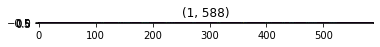

In [39]:
plt.imshow(five)
plt.title(five.shape)
plt.show()

In [40]:
layer4 = tf.keras.layers.Dense(32,activation='relu')
five = layer4(five)

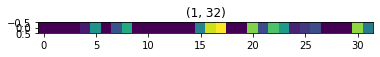

In [41]:
plt.imshow(five)
plt.title(five.shape)
plt.show()

In [42]:
layer5 = tf.keras.layers.Dropout(0.7)
five = layer5(five)

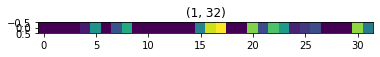

In [43]:
plt.imshow(five)
plt.title(five.shape)
plt.show()

# Build Model

In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import datasets
from tensorflow.keras import layers

In [45]:
(x_train, y_train),(x_test,y_test) = datasets.mnist.load_data()

In [46]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [47]:
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [48]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [49]:
x_train.dtype, x_test.dtype

(dtype('uint8'), dtype('uint8'))

In [50]:
x_train = tf.cast(x_train,dtype=tf.float32)

In [51]:
x_test = tf.cast(x_test,dtype=tf.float32)

In [52]:
x_train.dtype, x_test.dtype

(tf.float32, tf.float32)

In [53]:
input_shape = (28,28,1)
num_classes = 10

In [54]:
inputs = layers.Input((28,28,1))

net = layers.Conv2D(32,(3,3),padding = "SAME")(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,(3,3),padding = "SAME")(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size = (2,2),padding = "SAME")(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64,(3,3),padding = "SAME")(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,(3,3),padding = "SAME")(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size = (2,2),padding = "SAME")(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = "MinKi")

In [55]:
model

model 구조 자세히 보기

In [56]:
model.summary()

Model: "MinKi"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0     

## Optimization
- 최적화 하는 작업이다
- 나온 작업을 오류를 최소한으로 줄여서 업데이트해서 모델에 다시 넣는다

- Loss Function
    - Binary : 클래스가 2개일 경우
        - 'binary_crossentropy'
    - Categorical : 클래스가 2개 초과로 여러개 일 경우
        - 'categorical_crossentropy'
    - 원하지 않는 값을 얻었을 경우
        - tf.keras.losses.sparse_categorical_crossentropy
    - 원하는 값을 얻었을 경우
        - tf.keras.losses.categorical_crossentropy
    - 바이너리일 경우
        - tf.keras.losses.binary_crossentropy
- Optimization
- Metrics
    - accuracy
    - 전체 문제에서 몇개 맞힌 확률을 나타낸다
    - metrics = ['accuracy']
    - [tf.keras.metrics.Accuracy()]
    - 오류가 나면 [tf.keras.metrics.SparseCategoricalAccuracy()]

## Compile로 Optimizer 적용
- 'sgd'
- 'rmsprop'
- 'adam'
- tf.keras.optimizers.SGD()
- tf.keras.optimizers.RMSprop()
- tf.keras.optimizers.Adam()

In [57]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = "sparse_categorical_crossentropy",
             metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

## Training
- epochs
- batch_size

In [58]:
x_train.shape

TensorShape([60000, 28, 28, 1])

In [59]:
np.min(x_train), np.max(x_train)

(0.0, 255.0)

In [60]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [61]:
np.min(x_train), np.max(x_train)

(0.0, 1.0)

In [62]:
model.fit(x_train, y_train,
         batch_size=32,
         shuffle=True,
         epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 210s 4ms/sample - loss: 0.1473 - sparse_categorical_accuracy: 0.9540


## Check History
- 학습 과정(History) 결과 확인하기

In [63]:
hist = model.fit(x_train, y_train,
         batch_size=32,
         shuffle=True,
         epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 213s 4ms/sample - loss: 0.0581 - sparse_categorical_accuracy: 0.9825


In [64]:
hist.history

{'loss': [0.058127167681022544], 'sparse_categorical_accuracy': [0.98251665]}

## TensorFlow Training AI - expert

In [65]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers
from tensorflow.keras import datasets

In [66]:
inputs = layers.Input((28,28,1),dtype = tf.float32)

net = layers.Conv2D(32,3,padding="SAME")(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding="SAME")(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size=(2,2),padding="SAME")(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64,3,padding="SAME")(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,3,padding="SAME")(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size=(2,2),padding="SAME")(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = "keras_minki")

In [67]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

x_train, x_test = x_train / 255.0, x_test / 255.0

In [68]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

- 이미지로 한번 볼때

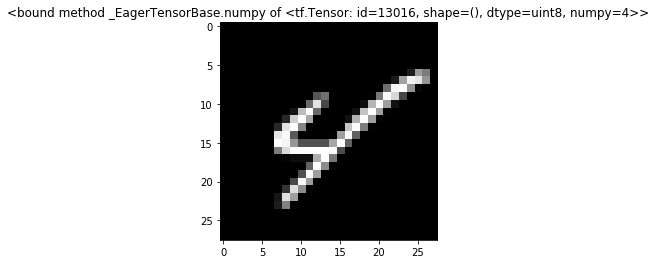

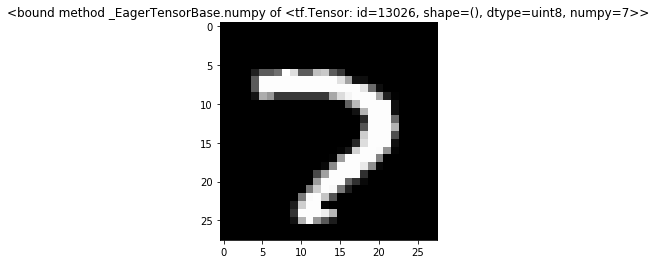

In [69]:
for image, label in train_ds.take(2):
    plt.title(label[0].numpy)
    plt.imshow(image[0,:,:,0],'gray')
    plt.show()

- Loss Function
- Optimizer

In [70]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

- 평균을 내서 넣는게 그래프가 부드럽거나 매끄럽게 보인다
    - loss = 오류
    - accuracy = 정확도
    - metrics = 정답확률

In [71]:
train_loss = tf.keras.metrics.Mean(name="train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="train_accuracy")

test_loss = tf.keras.metrics.Mean(name="test_loss")
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="test_accuracy")

In [72]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images) # 예측
        loss = loss_object(labels, predictions) # 오류
    gradients = tape.gradient(loss, model.trainable_variables) # 경사도
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # 오류 최적화
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [73]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels,predictions)

In [74]:
for epoch in range(2):
    print("Strat Training")
    for images, labels in train_ds:
        train_step(images, labels)
    
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
        
    template = "epoch {}, Loss {}, Accuracy {}, Test Loss {}, Test Accuracy {}"
    print(template.format(epoch + 1,
                         train_loss.result(),
                         train_accuracy.result() * 100,
                         test_loss.result(),
                         test_accuracy.result() * 100))

Strat Training

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch 1, Loss 0.10234972089529037, Accuracy 96.84333038330078, Test Loss 0.03080144338309765, Test Accuracy 98.93000030517578
Strat Training
epoch 2, Loss 0.06931290775537491, Accuracy 97.87999725341797, Test Loss 0.033877067267894745, Test Accuracy 98.84500122070312


## TensorFlow Training AI - Keras

In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers
from tensorflow.keras import datasets

In [76]:
inputs = layers.Input((28,28,1),dtype = tf.float32)

net = layers.Conv2D(32,3,padding="SAME")(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding="SAME")(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size=(2,2),padding="SAME")(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64,3,padding="SAME")(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,3,padding="SAME")(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size=(2,2),padding="SAME")(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = "keras_minki")

In [77]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [78]:
(train_x, train_y),(test_x, test_y) = datasets.mnist.load_data()

In [79]:
train_x = train_x[...,tf.newaxis]
test_x = test_x[...,tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

In [80]:
model.fit(train_x,train_y,
         batch_size = 32,
         shuffle = True)

Train on 60000 samples
60000/60000 [==============================] - 207s 3ms/sample - loss: 0.1946 - accuracy: 0.9390


In [81]:
model.history

- 학습한 모델 확인

In [82]:
model.evaluate(test_x,test_y, batch_size = 32)
# - 5s 516us/sample - loss: 0.0174 - accuracy: 0.9897 [0.03357652073389618, 0.9897]

- 결과 확인(예측용이라 레이어가 필요없다

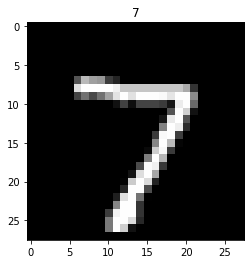

In [83]:
plt.title(test_y[0])
plt.imshow(test_x[0,:,:,0],'gray')
plt.show()

In [84]:
pred = model.predict(test_x[0].reshape(1,28,28,1))

In [85]:
pred

array([[2.6793003e-09, 1.5544565e-07, 4.7471656e-07, 2.7173519e-07,
        4.7804866e-10, 6.4407790e-10, 2.5850617e-12, 9.9999893e-01,
        1.7528602e-09, 8.9234206e-08]], dtype=float32)

In [86]:
pred.shape

(1, 10)

In [87]:
np.argmax(pred)

7

In [88]:
a = test_x[:32]

In [89]:
preds = model.predict(a)

In [90]:
np.argmax(preds, -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

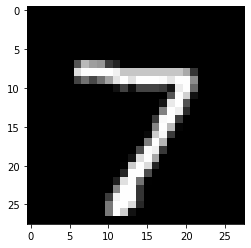

In [91]:
plt.imshow(a[0,:,:,0],'gray')
plt.show()

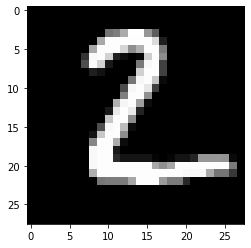

In [92]:
plt.imshow(a[1,:,:,0],'gray')
plt.show()